## Importing Librabries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Preprocessing & Cleaning

In [2]:
df = pd.read_csv('sales_data_sample.csv', sep=',', 
                 encoding='cp1252')
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
df.shape

(2823, 25)

In [4]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [6]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(['ORDERNUMBER', 'PRICEEACH', 'ORDERLINENUMBER', 'ORDERDATE',
         'PRODUCTCODE', 'PHONE', 'ADDRESSLINE2',
       'STATE', 'POSTALCODE', 'TERRITORY', 'CONTACTFIRSTNAME', 
       'CONTACTLASTNAME'], axis=1, inplace=True)

In [9]:
# Replace coded values with their month for 'MONTH_ID'
df['MONTH_ID'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',
                        5:'May', 6:'Jun', 7:'Jul', 8:'Aug',
                        9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
                       }, inplace=True)

In [10]:
df.sample(5)

,QUANTITYORDERED,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,ADDRESSLINE1,CITY,COUNTRY,DEALSIZE
1958,33,2407.68,Shipped,3,Aug,2004,Vintage Cars,83,"Royal Canadian Collectables, Ltd.",23 Tsawassen Blvd.,Tsawassen,Canada,Small
1722,37,1151.44,Shipped,4,Nov,2003,Classic Cars,35,"Stylish Desk Decors, Co.",35 King George,London,UK,Small
19,42,4396.14,Shipped,4,Nov,2004,Motorcycles,95,Land of Toys Inc.,897 Long Airport Avenue,NYC,USA,Medium
2271,22,4301.22,Shipped,4,Dec,2004,Trains,62,Reims Collectables,59 rue de l'Abbaye,Reims,France,Medium
194,47,8887.70,Shipped,4,Nov,2003,Classic Cars,207,Super Scale Inc.,567 North Pendale Street,New Haven,USA,Large


## Data Analysis & Visualization

### Q1. Which Year Had The Most Sales? 

In [11]:
df1 = df.groupby('YEAR_ID')["SALES"].sum().reset_index()
df1

,YEAR_ID,SALES
0,2003,3516979.54
1,2004,4724162.60
2,2005,1791486.71


In [12]:
def bar_plot(x,y, xlabel, ylabel, title):
    # Set theme
    sns.set_theme(font_scale=1.0)

    # Create the figure size
    plt.figure(figsize=(8,4))

    # Plot
    fig, ax = plt.subplots()
    bars = ax.bar(x, y, color='teal')

    ax.bar(x, y)

    # add labels and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    #ax.set_xticks(df1.YEAR_ID)
    #ax.set_xticklabels(['2003', '2004', '2005'])
    #ax.set_yticks(df1.SALES)


    # Add bar labels
    for bar, SALE in zip(bars, sales_in_millions):
        label = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, label+0.05 , round(label, 2), 
               ha='center', va='bottom')

    plt.show();

<Figure size 800x400 with 0 Axes>

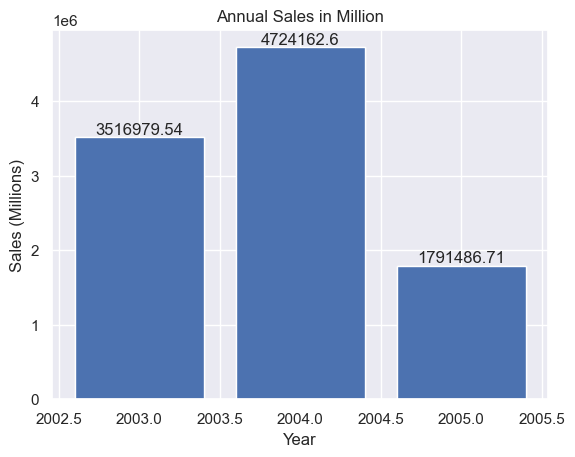

In [13]:
# Convert to millions
sales_in_millions = [SALE/1e6 for SALE in df1.SALES]

bar_plot(df1.YEAR_ID, df1.SALES, 'Year', 'Sales (Millions)',
         'Annual Sales in Million')

In [ ]:
# Convert to millions
sales_in_millions = [SALE/1e6 for SALE in df1.SALES]

# Set theme
sns.set_theme(font_scale=1.0)

# Create the figure size
plt.figure(figsize=(8,4))

# Plot
fig, ax = plt.subplots()
bars = ax.bar(df1.YEAR_ID, df1.SALES, color='teal')

ax.bar(df1.YEAR_ID, df1.SALES)

# add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Sales (Millions)')
ax.set_title('Annual Sales in Millions')
ax.set_xticks(df1.YEAR_ID)
ax.set_xticklabels(['2003', '2004', '2005'])
ax.set_yticks(df1.SALES)


# Add bar labels
for bar, SALE in zip(bars, sales_in_millions):
    label = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, label+0.05 , round(label, 2), 
           ha='center', va='bottom')
    
plt.show();

This plot shows that, out the three years, 2024 had the highest revenue; however, the data for 2024 is limited to five months.

### Q2. Which Month Had The Most Sales?

In [15]:
df2 = df.groupby('MONTH_ID')['SALES'].sum().reset_index()
df2.head()

,MONTH_ID,SALES
0,Apr,669390.96
1,Aug,659310.57
2,Dec,634679.12
3,Feb,810441.90
4,Jan,785874.44


<Figure size 800x400 with 0 Axes>

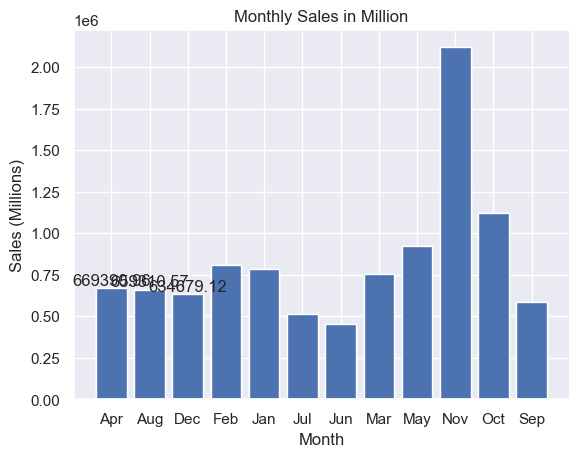

In [16]:
# Convert to millions
#sales_in_millions = [SALE/1e6 for SALE in df1.SALES]

bar_plot(df2.MONTH_ID, df2.SALES, 'Month', 'Sales (Millions)',
         'Monthly Sales in Million')

### Q3. Which Country Had The Most Sales?

### Q4. Which Country Had More Sales Growth?

### Q5. Which Item Had Sold The Most in 2003?

### Q6. Which Item Had Sold The Most in 2004?

### Q7. Which Item Had Sold The Most in 2005?

### Q8. Who are the Top 20% Customers?

### Q9. Which Amount of Revenue is Contributed by the Top 20% of Customers?